In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/oldteeth/allcor.zip

Archive:  /content/drive/MyDrive/oldteeth/allcor.zip
   creating: allcor/
  inflating: allcor/01.png           
  inflating: allcor/100043.png       
  inflating: allcor/10012.png        
  inflating: allcor/100143.png       
  inflating: allcor/100243.png       
  inflating: allcor/100343.png       
  inflating: allcor/100443.png       
  inflating: allcor/100543.png       
  inflating: allcor/100643.png       
  inflating: allcor/100743.png       
  inflating: allcor/100843.png       
  inflating: allcor/100943.png       
  inflating: allcor/101.png          
  inflating: allcor/101043.png       
  inflating: allcor/10112.png        
  inflating: allcor/101144.png       
  inflating: allcor/101244.png       
  inflating: allcor/101344.png       
  inflating: allcor/101444.png       
  inflating: allcor/101544.png       
  inflating: allcor/101644.png       
  inflating: allcor/101744.png       
  inflating: allcor/101844.png       
  inflating: allcor/101944.png       
  inflating: a

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from random import randint
import time
import os
import glob

In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/oldteeth/coarse.csv')

In [5]:
filename = data['filename'].to_list()

In [6]:
import glob
import cv2
X = []
files = '/content/allcor/'
for myfile in filename:
    image = cv2.imread(files+myfile)
    print(myfile)
    image = cv2.resize(image, (128,128))
    X.append(image)

01.png
10012.png
100143.png
100243.png
100343.png
100443.png
100543.png
100643.png
100743.png
100843.png
101.png
10112.png
101144.png
101244.png
101344.png
101444.png
101544.png
101644.png
101744.png
101844.png
101944.png
102044.png
10212.png
102144.png
102444.png
102544.png
102644.png
102744.png
102844.png
102944.png
103044.png
10312.png
103144.png
103244.png
103344.png
103444.png
103544.png
103644.png
103744.png
103844.png
103944.png
104044.png
10412.png
104245.png
104345.png
104545.png
104745.png
104845.png
104945.png
105045.png
10512.png
105145.png
105245.png
105345.png
105445.png
105545.png
105645.png
105745.png
105845.png
105945.png
106045.png
10612.png
106145.png
106245.png
106345.png
106445.png
106545.png
106645.png
106745.png
106845.png
106945.png
107045.png
107145.png
107245.png
107346.png
107846.png
107946.png
108046.png
108146.png
108246.png
108346.png
108446.png
108546.png
108646.png
108746.png
108846.png
108946.png
109046.png
109146.png
109246.png
109346.png
109446.png
10

In [7]:
x = np.asarray(X)

In [8]:
x.shape

(1346, 128, 128, 3)

In [9]:
data

,filename,class
0,01.png,good
1,10012.png,good
2,100143.png,good
3,100243.png,good
4,100343.png,good
...,...,...
1341,97742.png,bad
1342,97942.png,bad
1343,98042.png,bad
1344,98142.png,bad


In [10]:
data['class'].value_counts()

good    1031
bad      315
Name: class, dtype: int64

In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['class'] = labelencoder.fit_transform(data['class'])

In [12]:
data['class'].value_counts()

1    1031
0     315
Name: class, dtype: int64

In [13]:
data

,filename,class
0,01.png,1
1,10012.png,1
2,100143.png,1
3,100243.png,1
4,100343.png,1
...,...,...
1341,97742.png,0
1342,97942.png,0
1343,98042.png,0
1344,98142.png,0


In [14]:
arr = []
for i in data['class']:
    arr.append([i])

In [15]:
y = np.asarray(arr)

In [16]:
def one_hot(y):
    n_values = np.max(y) + 1
    y_new = np.eye(n_values)[y[:,0]]
    return y_new

In [17]:
y = one_hot(y)

In [18]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size =.1, random_state = 27)

In [19]:
y_train[0]

array([0., 1.])

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1211, 128, 128, 3), (135, 128, 128, 3), (1211, 2), (135, 2))

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
base_model = tf.keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False)


94781440/94765736 [==============================] - 1s 0us/step


In [23]:
dropout_rate = 0.5
model_n = tf.keras.models.Sequential()
model_n.add(base_model)
model_n.add(tf.keras.layers.GlobalMaxPooling2D(name="gap"))
if dropout_rate > 0:
    model_n.add(tf.keras.layers.Dropout(dropout_rate, name="dropout_out"))
model_n.add(tf.keras.layers.Dense(2, activation='sigmoid', name="fc_out"))

In [24]:
model_n.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy','precision','recall',''])

from tensorflow.keras import callbacks

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 20, restore_best_weights = True, verbose=1)
model_checkpoint = ModelCheckpoint('Normal_classifier.h5', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
model_n.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])



from tensorflow.keras import callbacks



from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping




earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 20, restore_best_weights = True, verbose=1)

model_checkpoint = ModelCheckpoint('Normal_classifier.h5', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=1000, BATCH_SIZE=8):
    model = model_n
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[earlystopping,model_checkpoint], 
              verbose=1, validation_split=0.2)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [27]:
n_folds=1
epochs=1000
batch_size=8

In [28]:
model_n.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2048)              0         
                                                                 
 dropout_out (Dropout)       (None, 2048)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [29]:
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/1000
97/97 [==============================] - ETA: 0s - loss: 1.5780 - accuracy: 0.8062 - precision: 0.7038 - recall: 0.8566
Epoch 1: val_loss improved from inf to 3.46725, saving model to Normal_classifier.h5
97/97 [==============================] - 37s 190ms/step - loss: 1.5780 - accuracy: 0.8062 - precision: 0.7038 - recall: 0.8566 - val_loss: 3.4673 - val_accuracy: 0.5670 - val_precision: 0.5720 - val_recall: 0.7371
Epoch 2/1000
97/97 [==============================] - ETA: 0s - loss: 0.7937 - accuracy: 0.9070 - precision: 0.7974 - recall: 0.9354
Epoch 2: val_loss improved from 3.46725 to 0.43507, saving model to Normal_classifier.h5
97/97 [==============================] - 16s 162ms/step - loss: 0.7937 - accuracy: 0.9070 - precision: 0.7974 - recall: 0.9354 - val_loss: 0.4351 - val_accuracy: 0.9588 - val_precision: 0.8843 - val_recall: 0.9845
Epoch 3/1000
97/97 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.9276 - precision: 0.

In [30]:
df = pd.DataFrame()
for i in model_history[0].history.keys():
  df[i] = model_history[0].history[i]

In [31]:
df.to_csv('/content/drive/MyDrive/oldteeth/history_resnet_coarse.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff8fe25e10>,
      dtype=object)

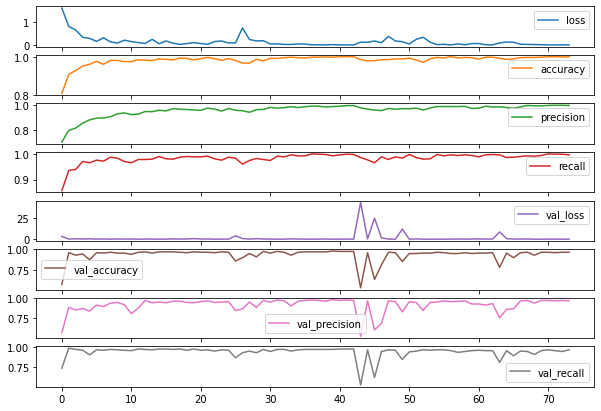

In [32]:
df.plot(subplots = True,figsize = (10,7))

### Fine Classifier

In [33]:
!unzip /content/drive/MyDrive/oldteeth/fines.zip

Archive:  /content/drive/MyDrive/oldteeth/fines.zip
   creating: fines/
  inflating: fines/100043.png        
  inflating: fines/100943.png        
  inflating: fines/101043.png        
  inflating: fines/102244.png        
  inflating: fines/102344.png        
  inflating: fines/104144.png        
  inflating: fines/104445.png        
  inflating: fines/104645.png        
  inflating: fines/10712.png         
  inflating: fines/107446.png        
  inflating: fines/107546.png        
  inflating: fines/107646.png        
  inflating: fines/107746.png        
  inflating: fines/10812.png         
  inflating: fines/10912.png         
  inflating: fines/110747.png        
  inflating: fines/112047.png        
  inflating: fines/11212.png         
  inflating: fines/112147.png        
  inflating: fines/112247.png        
  inflating: fines/11312.png         
  inflating: fines/11512.png         
  inflating: fines/115948.png        
  inflating: fines/116048.png        
  inflating: fin

In [34]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/oldteeth/fine.csv')

In [ ]:
data

In [36]:
data['fine'].value_counts()

1    168
6     51
2     30
5     25
3     23
4     18
Name: fine, dtype: int64

In [37]:
filename = data['filename']

In [38]:
import glob
import cv2
X = []
files = '/content/fines/'
for myfile in filename:
    image = cv2.imread(files+myfile)
    print(myfile)
    image = cv2.resize(image, (128,128))
    X.append(image)

100043.png
101043.png
104144.png
104445.png
104645.png
107446.png
107546.png
107646.png
10912.png
110747.png
112047.png
112247.png
11312.png
115948.png
116048.png
11612.png
11712.png
117949.png
118249.png
118549.png
118649.png
118849.png
11913.png
12586.png
12656.png
12813.png
12913.png
13028.png
13038.png
13048.png
13058.png
13068.png
13078.png
13088.png
13098.png
13108.png
13118.png
13128.png
13138.png
13148.png
13158.png
13349.png
13713.png
13813.png
16515.png
16615.png
16715.png
16815.png
17215.png
17315.png
18216.png
18316.png
18416.png
18516.png
18616.png
18716.png
18816.png
18916.png
19016.png
19116.png
19216.png
19316.png
19416.png
19516.png
19616.png
19716.png
20817.png
21117.png
21317.png
21917.png
22017.png
24918.png
25018.png
25218.png
261.png
281.png
291.png
2972.png
3012.png
311.png
3192.png
3310.png
33320.png
33420.png
33520.png
33620.png
33820.png
34020.png
34220.png
34320.png
34620.png
37021.png
3710.png
3810.png
3910.png
42723.png
43223.png
45424.png
45524.png
45624.p

In [39]:
len(X)

315

In [40]:
x = np.asarray(X)

In [41]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['fine'] = labelencoder.fit_transform(data['fine'])

In [42]:
data

,filename,coarse,fine
0,100043.png,bad,0
1,101043.png,bad,0
2,104144.png,bad,0
3,104445.png,bad,0
4,104645.png,bad,0
...,...,...,...
310,83338.png,bad,5
311,83438.png,bad,5
312,86039.png,bad,5
313,93341.png,bad,5


In [43]:
arr = []
for i in data['fine']:
    arr.append([i])
y = np.asarray(arr)

In [44]:
len(y)

315

In [45]:
def one_hot(y):
    n_values = np.max(y) + 1
    y_new = np.eye(n_values)[y[:,0]]
    return y_new

In [46]:
y=one_hot(y)

In [47]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size =.1, random_state = 27)

In [48]:
y_train[0]

array([1., 0., 0., 0., 0., 0.])

In [49]:
base_model = tf.keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False)


In [50]:
dropout_rate = 0.5
model_f = tf.keras.models.Sequential()
model_f.add(base_model)
model_f.add(tf.keras.layers.GlobalMaxPooling2D(name="gap"))
if dropout_rate > 0:
    model_f.add(tf.keras.layers.Dropout(dropout_rate, name="dropout_out"))
model_f.add(tf.keras.layers.Dense(6, activation='softmax', name="fc_out"))

In [51]:
model_f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2048)              0         
                                                                 
 dropout_out (Dropout)       (None, 2048)              0         
                                                                 
 fc_out (Dense)              (None, 6)                 12294     
                                                                 
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


In [52]:
model_f.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras import callbacks

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 20, restore_best_weights = True,verbose=1)
model_checkpoint = ModelCheckpoint('Fine_classifier.h5', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [53]:
n_folds=1
epochs=200
batch_size=8

In [54]:
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=1000, BATCH_SIZE=8):
    model = model_f
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[model_checkpoint], 
              verbose=1, validation_split=0.2)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [55]:
#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/200
23/23 [==============================] - ETA: 0s - loss: 7.9291 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 3.38499, saving model to Fine_classifier.h5
23/23 [==============================] - 17s 359ms/step - loss: 7.9291 - accuracy: 0.2500 - val_loss: 3.3850 - val_accuracy: 0.4130
Epoch 2/200
23/23 [==============================] - ETA: 0s - loss: 2.5967 - accuracy: 0.6167
Epoch 2: val_loss improved from 3.38499 to 2.95353, saving model to Fine_classifier.h5
23/23 [==============================] - 5s 226ms/step - loss: 2.5967 - accuracy: 0.6167 - val_loss: 2.9535 - val_accuracy: 0.5435
Epoch 3/200
23/23 [==============================] - ETA: 0s - loss: 1.5933 - accuracy: 0.7556
Epoch 3: val_loss did not improve from 2.95353
23/23 [==============================] - 3s 140ms/step - loss: 1.5933 - accuracy: 0.7556 - val_loss: 3.7794 - val_accuracy: 0.4348
Epoch 4/200
23/23 [==============================] - ETA: 0s - loss: 1.3342 - accur

In [56]:
df = pd.DataFrame()
for i in model_history[0].history.keys():
  df[i] = model_history[0].history[i]

In [57]:
df.to_csv('/content/drive/MyDrive/oldteeth/history_resnet_fine.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff8b1708d0>,
      dtype=object)

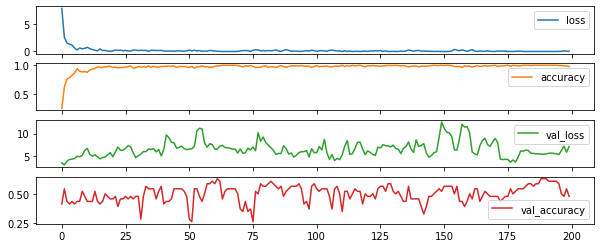

In [58]:
df.plot(subplots = True,figsize = (10,4))